<a href="https://colab.research.google.com/github/Ksingh2305/CC-coursework/blob/main/Karan_1023160115_CC_Assingment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,**
**clean and process it, perform statistical analysis, and generate visual insights to help the**
**business make informed decisions.**

1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
  *    Well-documented code and clear comments.
  *    Markdown explanations for each step.
  *    Screenshots of the plots and outputs.

**Part I: Randomized Sales Data Generation (NumPy)**
1. IniƟalize Random Seed
2. Generate Sales Data
  *   Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
  where each column represents a product category:
  *   Electronics, Clothing, Home & Kitchen, Sports.
  *   Sales values should be between 1000 and 5000 units per month.
  *   The range should be randomized using the seed.


3. Convert to DataFrame
  *   Convert the cleaned NumPy array into a Pandas DataFrame with:
    1.   Columns: Electronics, Clothing, Home & Kitchen, Sports
    2.   Index: Months from Jan to Dec

**Part II: Data ManipulaƟon and Analysis (Pandas)**
1. Display the first 5 rows and summary statatics of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecutive months for each category.
4. Add the following columns to the DataFrame:
  *   Total Sales: Sum of all categories per month.
  *   Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
  *   If your roll number is even, apply a 10% discount to the Electronics category.
  *   If odd, apply a 15% discount to the Clothing category.

**Part III: Visualizations (Matplotlib and Seaborn)**
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
  *   Box plots to show the sales distribuƟon for each category.












In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#roll number as seed
roll_number = 102316115
np.random.seed(roll_number)

In [8]:
#generating the sales data
sales_data = np.random.randint(1000,5001,size=(12, 4))
print(sales_data)

[[1423 2276 4573 3005]
 [1461 3931 1084 4105]
 [2274 1371 1223 1699]
 [1758 4143 1810 1351]
 [4479 4535 3075 1672]
 [1480 4077 4546 3579]
 [4051 4385 1055 3634]
 [4585 1397 4489 3752]
 [4483 1048 2453 4791]
 [2263 1991 1478 2342]
 [4122 1931 2657 1806]
 [4415 2980 4973 2544]]


In [9]:
#now converting it to the pandas dataframe
columns = ['electronics','clothing','home and kitchen','sports']
months = ['jan','feb','march','april','may','june','july','aug','sept','oct','nov','dec']

#convert to dataframe
df = pd.DataFrame(sales_data,columns=columns,index= months) #provided the random data along with the column name and the row name in the option index

In [10]:
#PART2
print(df.iloc[1:6,:]) #first five row of the dataset
print(df.describe()) #summary of the dataset

       electronics  clothing  home and kitchen  sports
feb           1461      3931              1084    4105
march         2274      1371              1223    1699
april         1758      4143              1810    1351
may           4479      4535              3075    1672
june          1480      4077              4546    3579
       electronics     clothing  home and kitchen       sports
count    12.000000    12.000000         12.000000    12.000000
mean   3066.166667  2838.750000       2784.666667  2856.666667
std    1381.395463  1314.760339       1513.116912  1117.091217
min    1423.000000  1048.000000       1055.000000  1351.000000
25%    1688.500000  1797.500000       1414.250000  1779.250000
50%    3162.500000  2628.000000       2555.000000  2774.500000
75%    4431.000000  4093.500000       4503.250000  3663.500000
max    4585.000000  4535.000000       4973.000000  4791.000000


In [11]:
#total sales of the category
category_sales = df.sum(axis=0) #it means the sum is along the y axis
#total sales per month
df['total_sales'] = df.sum(axis=1) #it means the sum is along each the x axis
monthly_sales = df['total_sales']
print(category_sales)
print(monthly_sales)
print(df) #also added the column in the dataset only

electronics         36794
clothing            34065
home and kitchen    33416
sports              34280
dtype: int64
jan      11277
feb      10581
march     6567
april     9062
may      13761
june     13682
july     13125
aug      14223
sept     12775
oct       8074
nov      10516
dec      14912
Name: total_sales, dtype: int64
       electronics  clothing  home and kitchen  sports  total_sales
jan           1423      2276              4573    3005        11277
feb           1461      3931              1084    4105        10581
march         2274      1371              1223    1699         6567
april         1758      4143              1810    1351         9062
may           4479      4535              3075    1672        13761
june          1480      4077              4546    3579        13682
july          4051      4385              1055    3634        13125
aug           4585      1397              4489    3752        14223
sept          4483      1048              2453    4791     

In [12]:
# Calculate the average sales growth between consecuƟve months for each category.
growth = df[columns].pct_change().mean() #here pct_change is inbuilt fucntion in order to find out the percentage change
print(growth)

electronics         0.316233
clothing            0.240787
home and kitchen    0.393445
sports              0.086057
dtype: float64


In [13]:
# adding the column of the
# Growth Rate: Percentage change in Total Sales from the previous month.
df['growth rate(%)'] = df['total_sales'].pct_change()*100
print(df)

       electronics  clothing  home and kitchen  sports  total_sales  \
jan           1423      2276              4573    3005        11277   
feb           1461      3931              1084    4105        10581   
march         2274      1371              1223    1699         6567   
april         1758      4143              1810    1351         9062   
may           4479      4535              3075    1672        13761   
june          1480      4077              4546    3579        13682   
july          4051      4385              1055    3634        13125   
aug           4585      1397              4489    3752        14223   
sept          4483      1048              2453    4791        12775   
oct           2263      1991              1478    2342         8074   
nov           4122      1931              2657    1806        10516   
dec           4415      2980              4973    2544        14912   

       growth rate(%)  
jan               NaN  
feb         -6.171854  
marc

In [14]:
if roll_number % 2 == 0:
  df['electronics(after dicount)'] = df['electronics']*0.9 #as we are giving the 10 percent discount so teh orginal priced electronic item will be sold at the 90% price
else :
  df['clothing(after dicount)'] = df['clothing']*0.85 #as we are giving the 10 percent discount so teh orginal priced clothing item will be sold at the 85% price


print(df) #as my roll number is even so it will be having the dicount on the electronics product

       electronics  clothing  home and kitchen  sports  total_sales  \
jan           1423      2276              4573    3005        11277   
feb           1461      3931              1084    4105        10581   
march         2274      1371              1223    1699         6567   
april         1758      4143              1810    1351         9062   
may           4479      4535              3075    1672        13761   
june          1480      4077              4546    3579        13682   
july          4051      4385              1055    3634        13125   
aug           4585      1397              4489    3752        14223   
sept          4483      1048              2453    4791        12775   
oct           2263      1991              1478    2342         8074   
nov           4122      1931              2657    1806        10516   
dec           4415      2980              4973    2544        14912   

       growth rate(%)  clothing(after dicount)  
jan               NaN      

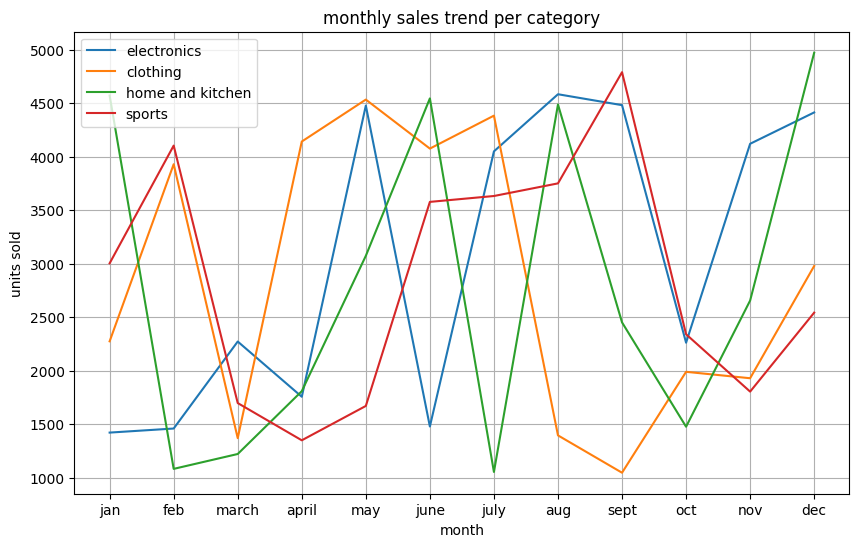

In [15]:
#part 3
plt.figure(figsize=(10,6))
for col in columns:
  plt.plot(df.index,df[col],label=col)

plt.title('monthly sales trend per category')
plt.xlabel('month')
plt.ylabel('units sold')
plt.legend()
plt.grid(True)
plt.show()

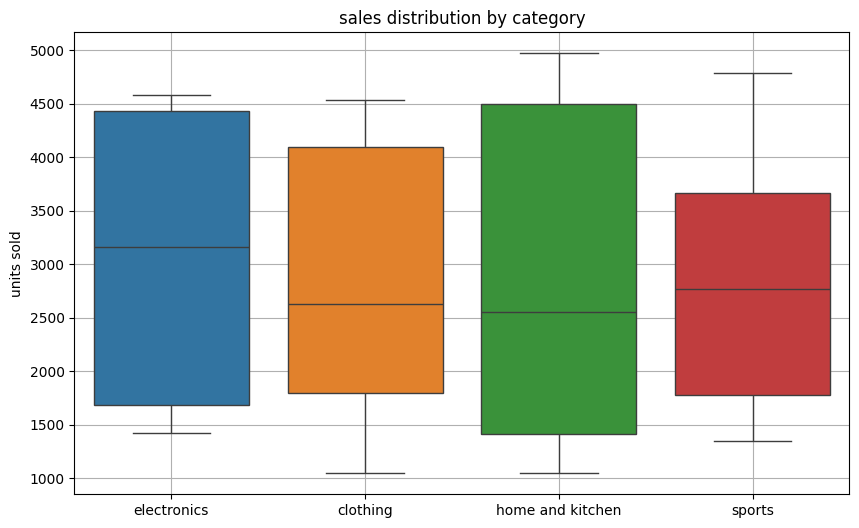

In [16]:
plt.figure(figsize=(10,6))
# sns.boxplot(data=df[columns])
sns.boxplot(df[columns])

plt.title('sales distribution by category')
plt.ylabel('units sold')
plt.grid(True)
plt.show()

Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])

1.   Find element-wise absolute value
2.   Find the 25th, 50th, and 75th percentile of flatened array, for each column, for each row.
1.   Mean, Median and Standard Deviation of flatened array, of each column, and
each row


In [ ]:
array = np.array([[1,-2,3],[-4,5,-6]])
print(array)
abs_array = np.abs(array) #works fine with this also -> abs_array = abs(array)
print("element wise absolute value : ")
print(abs_array)

print('percentile of the flattened array')
flat_array = array.flatten()
percentile_flat = np.percentile(flat_array,[25,50,75])
print(percentile_flat)
percentile_col = np.percentile(array,[25,50,75],axis=0)
print(percentile_col)
percentile_row = np.percentile(array,[25,50,75],axis=1)
print(percentile_row)

print("\n")
# mean_array = flat_array.mean() #this will also work
mean_flat = np.mean(flat_array)
median_flat = np.median(flat_array)
standarddeviation_flat = np.std(flat_array)
print(mean_array)
print(mean_flat)
print(median_flat)
print(standarddeviation_flat)

[[ 1 -2  3]
 [-4  5 -6]]
element wise absolute value : 
[[1 2 3]
 [4 5 6]]
percentile of the flattened array
[-3.5 -0.5  2.5]
[[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
[[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


-0.5
-0.5
-0.5
3.8622100754188224


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
  1.   Find floor, ceiling and truncated value, rounded values




In [ ]:
a = np.array([-1.8,-1.6,-0.5,0.5,1.6,1.8,3.0])
#Floor value
floor_val = np.floor(a)
print(floor_val)
#Ceiling value
ceil_val = np.ceil(a)
print(ceil_val)
#Truncated value
truncated_val = np.trunc(a)
print(truncated_val)
#Rounded value
rounded_value = np.round(a)
print(rounded_value)

[-2. -2. -1.  0.  1.  1.  3.]
[-1. -1. -0.  1.  2.  2.  3.]
[-1. -1. -0.  0.  1.  1.  3.]
[-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [ ]:
lst = [1,2,3,4,5,6,7,8,9]

first , second = np.random.choice(lst,size=2,replace=False)

temp = first
print('value of x : ',first)
print('value of y : ',second)
print('value of temp : ',temp)

first = second
second = temp
print('new value of x : ',first)
print('new value of y : ',second)

value of x :  7
value of y :  1
value of temp :  7
new value of x :  1
new value of y :  7


Q.5 Write a Python program to swap two elements in a set by converging it to a list first.

In [ ]:
s = {1,2,3,4,5,6,7}
lst = list(s)
print('this is the old set : ',s) #set
print('this is the old list',lst) #list

firstidx , secondidx = np.random.choice(len(lst),size=2,replace=False)

temp = lst[firstidx]
lst[firstidx] = lst[secondidx]
lst[secondidx] = temp
swapped_set = set(lst)
print('this is the new list : ',lst)
print('this is the new set : ',swapped_set)


this is the old set :  {1, 2, 3, 4, 5, 6, 7}
this is the old list [1, 2, 3, 4, 5, 6, 7]
this is the new list :  [7, 2, 3, 4, 5, 6, 1]
this is the new set :  {1, 2, 3, 4, 5, 6, 7}
